# Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [9]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import thinkstats2
import thinkplot

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

### Experiment to show that using xbar and median to estimate µ, that  xbar  yields lower MSE

In [3]:
# Solution goes here
# Root mean squared error(RMSE) is one of several ways to summarize the average error of an estimation process.

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size n=7. We run iters=100000 experiments and collect the mean and median of each sample.

In [4]:
import random

def Estimate_mean(n=7, iters=100000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Estimate Mean')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate_mean()

Estimate Mean
rmse xbar 0.37745353507995033
rmse median 0.4571596608617148


RMSE using xbar to estimate the mean is 0.38 
RMSE using median to estimate the mean is 0.46

So the experiment shows that if we use xbar to estimate the mean of this distribution, it is 0.38 based on a sample with n = 7, we should expect to be off by 0.38 on average. 
On the other hand using the median to estimate the mean yields RMSE 0.46, which confirms that xbar yields lower RMSE, at least for this example.
But using the median is more robust in the presence of outliers or large errors.

Used  𝑆2  and  𝑆2𝑛−1  to estimate σ, and found that  𝑆2  is biased and  𝑆2𝑛−1  unbiased.

The obvious way to estimate the variance of a population is to compute the variance of the sample,  𝑆2 , but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size n=9. We run iters=1000 experiments and two estimates for each sample,  𝑆2  and  𝑆2𝑛−1 

In [6]:
def Estimate_var(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates_biased = []
    estimates_unbiased = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates_biased.append(biased)
        estimates_unbiased.append(unbiased)

    print('mean error biased', MeanError(estimates_biased, sigma**2))
    print('mean error unbiased', MeanError(estimates_unbiased, sigma**2))
    
Estimate_var()

mean error biased -0.14446628707146592
mean error unbiased -0.0018773349167102518


The mean error for  𝑆2 (biased) is non-zero(-.14), which suggests that it is biased. The mean error for  𝑆2𝑛−1(unbiased)  is (-.0014) which is 100 times smaller and close to zero. As # of iterations increases we expect it to get even smaller.

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

The following function simulates experiments where we estimate the mean of a exponential distribution using xbar, and returns a list of estimates, one from each experiment.
Generating the sample of n = 10 for a exponential distribution of lambda = 2. Simulating this 1000 times

In [7]:
def simulate_sample(n=10, iters=1000):
    lam = 2

    means = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)

    print('rmse L - Standard error', RMSE(means, lam))
    print('mean error L', MeanError(means, lam))
    return means
    
xbars = simulate_sample()

rmse L - Standard error 0.8015493207531054
mean error L 0.22515068714930428


Here's the "sampling distribution of the mean" which shows how much we should expect 𝑥bar to vary from one experiment to the next.

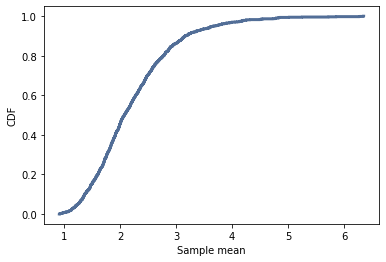

In [10]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [11]:
np.mean(xbars)

2.2251506871493043

In [12]:
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)

confidence interval (1.2502597552474815, 3.655222590234591)


Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

## The 90% confidence interval is the range from the 5th to the 95th percentile. 
### In this example,for n = 10(sample size) the 90% CI is (1.26; 3.74) Standard err 0.79 
### In this example,for n = 100(sample size) the 90% CI is (1.72; 2.39) Standard err 0.20 
### In this example,for n = 1000(sample size) the 90% CI is (1.90; 2.11) Standard err 0.06 

In [45]:
def simulate_sample1(n, iters=1000):
    lam = 2

    means = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)

    rmse = RMSE(means, lam)
    return rmse

In [50]:

sample = []
stde = []

for n in [10,50,100,250,500,750,1000]:
    se = simulate_sample1(n)
    sample.append(n)
    stde.append(se)
    
# sample , stde

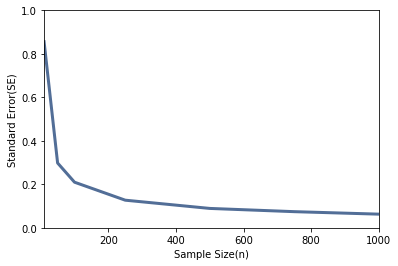

In [57]:
label = ''
thinkplot.Plot(sample,stde, label=label)
thinkplot.Config(xlabel='Sample Size(n)',
                 ylabel='Standard Error(SE)',
                 axis=[10,1000,0,1],
                 legend=False)

The above plot for the Standard Error against the sample size shows that as the sample size increases the standard error goes down. The rate of decrease of the standard error is rapid for the sample size upto 100 and then it gradually tapers down.